Fold 0:
  Train: index=[ 0  1  3  4  5  6  9 10 12 15 16 19 20 21 22 24 25 26 27 28 31]
  Test:  index=[ 2  7  8 11 13 14 17 18 23 29 30]
Fold 1:
  Train: index=[ 1  2  3  5  7  8 10 11 12 13 14 17 18 19 20 21 22 23 26 29 30]
  Test:  index=[ 0  4  6  9 15 16 24 25 27 28 31]
Fold 2:
  Train: index=[ 0  2  4  6  7  8  9 11 13 14 15 16 17 18 23 24 25 27 28 29 30 31]
  Test:  index=[ 1  3  5 10 12 19 20 21 22 26]
Fold 3:
  Train: index=[ 0  2  4  5  6  7 11 12 15 16 17 19 22 23 24 25 26 27 28 29 30]
  Test:  index=[ 1  3  8  9 10 13 14 18 20 21 31]
Fold 4:
  Train: index=[ 0  1  3  4  7  8  9 10 11 13 14 15 17 18 19 20 21 23 24 28 31]
  Test:  index=[ 2  5  6 12 16 22 25 26 27 29 30]
Fold 5:
  Train: index=[ 1  2  3  5  6  8  9 10 12 13 14 16 18 20 21 22 25 26 27 29 30 31]
  Test:  index=[ 0  4  7 11 15 17 19 23 24 28]
Fold 6:
  Train: index=[ 0  4  5  6  9 11 12 13 14 15 16 18 20 22 24 25 27 28 29 30 31]
  Test:  index=[ 1  2  3  7  8 10 17 19 21 23 26]
Fold 7:
  Train: index=[ 0  1  2  

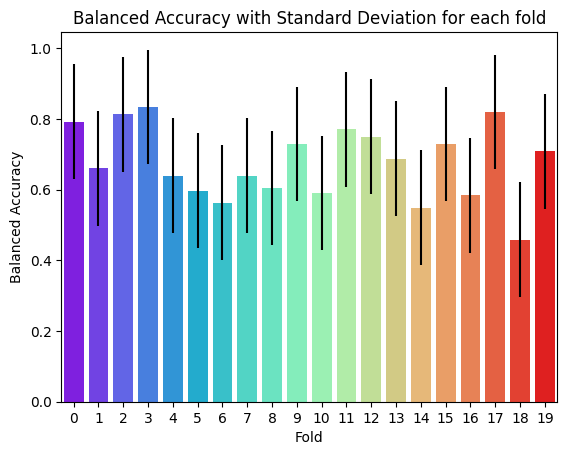

In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Read CSV file into DataFrame
fileName = "https://raw.githubusercontent.com/Nezu-life/Data_Science_For_Medicine_and_Biology/main/datasets/parkinsons.csv"
df = pd.read_csv(fileName)

# Average variables by 'name', ignoring 'test', 'name'
df_grouped = df.drop(columns=['test', 'name']).groupby(df['name']).mean()

# Prepare the features and target variable
X = df_grouped.drop(columns=['status']).values
y = df_grouped['status'].values

# Number of splits and repetitions
n_splits = 3
n_repeats = 20

# Initialize variables to store results
fold_results = {i: [] for i in range(n_repeats)}

# Define the stratified K-fold split
rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

# Train and test the Random Forest classifier
for fold, (train_index, test_index) in enumerate(rskf.split(X, y)):
    print(f"Fold {fold}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate balanced accuracy
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    fold_results[fold % n_repeats].append(bal_acc)

# Plotting the barplot with standard deviations
fold_means = [np.mean(fold_results[i]) for i in range(n_repeats)]
fold_stds = [np.std(fold_results[i]) for i in range(n_repeats)]

print(f"Average accuracy of all folds: {np.mean(fold_means)}:")

sns.barplot(x=list(range(n_repeats)), y=fold_means, yerr=fold_stds[0], hue=list(range(n_repeats)), legend=False, palette='rainbow')
plt.xlabel('Fold')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy with Standard Deviation for each fold')
plt.show()
